# Libraries


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
print(plt.rcParams.get('figure.figsize'))


[6.0, 4.0]


# Loading data

## Training & Games

In [2]:
# loading data from Google Drive
data_full = pd.read_csv('/content/drive/My Drive/consulting/Rugby/GPS/data_full.csv')

data_full.head()

,Athlete,Position,Date,Session,Drill,Weeks,Duration,Day Code,Participation,Squad,S-RPE,RPE,Distance,Distance Zone 1,Distance Zone 2,Distance Zone 3,Distance Zone 4,Distance Zone 5,Distance Zone 6,marche,LSR,HSR,VHSR,Max Speed,M.min,Max HR,Avg HR,HR Exertion,Time in HR Zone 1,Time in HR Zone 2,Time in HR Zone 3,Time in HR Zone 4,Time in HR Zone 5,Time in HR Zone 6,TPS >85%HR,% TPS >85%HR,Speed Exertion,Sprint Count,Accelerations Zone 1,Accelerations Zone 2,...,impact 1 + 2,Impacts Zone 3,Impacts Zone 4,impact 3+ 4,Impacts Zone 5,Impacts Zone 6,impact 5+ 6,Collisions,Running Series,Running Imbalance,Running Imbalance Standard Deviation,Running Symmetry Footstrikes,Metabolic Load Time Zone 1,Metabolic Load Time Zone 2,Metabolic Load Time Zone 3,Metabolic Load Time Zone 4,Metabolic Load Time Zone 5,Metabolic Load (relative),Metabolic Power Average,High-Metabolic-Power Distance,VHMPD,Equivalent Distance,Metabolic Load Distance Zone 1,Metabolic Load Distance Zone 2,Metabolic Load Distance Zone 3,Metabolic Load Distance Zone 4,Metabolic Load Distance Zone 5,Metabolic Load (absolute),Temperature,Weather,Grass,Sprint Total Distance,Sum_AD,HSR.min,SpTD.min,Sum_AD.min,Impacts.min,Type,HMPD.min,Sp_acc
0,athlete 1,2è ligne,2014-07-21T00:00:00Z,sep avants j-2 rep,Touche,5,52.38,day 1,Full,Forwards,157.14,3.0,1205.27,751.48,196.96,220.08,36.75,0.00,0.0,751.48,417.04,36.75,0.00,18.72,23.010118,183.0,139.72,152.72,9.29,7.11,16.67,17.36,1.69,0.27,1.96,0.037412,3387.8,0.0,1.0,0.0,...,51.0,15.0,7.0,22.0,2.0,9.0,11.0,0.0,4.0,0.7,6.8,55.0,49.6,2.1,0.5,0.2,0.1,6.9,2.2,134.2,49.3,1481.6,764.5,306.6,84.9,35.9,13.4,750.0,Unknown,Unknown,Unknown,0.0,0.0,0.701604,0.0,0.0,0.171821,Training,2.562047,0.0
1,athlete 1,2è ligne,2014-07-21T00:00:00Z,coll j-2 rep,Ateliers technique,5,97.65,day 1,Full,Forwards,683.55,7.0,4674.08,2432.61,1065.51,833.21,318.12,24.64,0.0,2432.61,1898.72,342.76,24.64,22.75,47.865643,199.0,143.51,453.83,18.43,12.45,23.05,25.53,16.24,1.95,18.19,0.186278,7030.6,0.0,1.0,0.0,...,250.0,31.0,32.0,63.0,18.0,25.0,43.0,1.0,7.0,2.3,2.9,97.0,54.9,13.7,12.8,6.1,10.1,143.4,24.5,3310.4,2241.9,30881.0,439.4,923.9,1068.5,652.6,1589.3,15631.9,Unknown,Unknown,Unknown,0.0,0.0,3.510087,0.0,0.0,0.256016,Training,33.900666,0.0
2,athlete 1,2è ligne,2014-07-28T00:00:00Z,sep avants j-3 rep g2,Touche,6,43.85,day 1,Full,Forwards,175.40,4.0,1488.11,916.59,318.01,235.15,18.36,0.00,0.0,916.59,553.16,18.36,0.00,18.47,33.936374,176.0,140.96,124.67,3.47,9.78,16.94,11.16,2.45,0.05,2.50,0.057013,2924.0,0.0,1.0,0.0,...,48.0,10.0,8.0,18.0,2.0,10.0,12.0,0.0,4.0,3.1,2.8,73.0,41.8,1.5,0.4,0.1,0.0,7.2,2.7,103.5,25.5,1547.9,1113.5,271.1,78.0,22.2,3.3,783.5,Unknown,Unknown,Unknown,0.0,0.0,0.418700,0.0,0.0,0.228050,Training,2.360319,0.0
3,athlete 1,2è ligne,2014-07-28T00:00:00Z,coll j-3 rep,Ateliers technique,6,70.68,day 1,Full,Forwards,353.40,5.0,4382.54,2255.20,1155.82,615.73,261.86,93.92,0.0,2255.20,1771.55,355.78,93.92,23.00,62.005376,178.0,138.38,181.00,11.54,10.87,25.93,21.09,1.19,0.07,1.26,0.017824,5348.2,0.0,1.0,0.0,...,193.0,31.0,36.0,67.0,7.0,11.0,18.0,0.0,2.0,-0.9,1.1,45.0,64.2,3.9,1.7,0.7,0.2,21.3,5.0,577.4,214.5,4584.1,3083.4,721.7,362.9,169.2,45.3,2320.4,Unknown,Unknown,Unknown,0.0,0.0,5.033673,0.0,0.0,0.155631,Training,8.169213,0.0
4,athlete 1,2è ligne,2014-07-22T00:00:00Z,sep avant j-1 rep,mélée et ballons lents,5,56.20,day 2,Full,Forwards,168.60,3.0,1755.01,1079.84,404.80,262.40,7.97,0.00,0.0,1079.84,667.20,7.97,0.00,18.00,31.227936,206.0,133.06,149.89,19.55,10.80,13.10,10.33,1.75,0.68,2.43,0.043231,3715.6,0.0,1.0,0.0,...,46.0,5.0,10.0,15.0,3.0,5.0,8.0,0.0,2.0,-2.1,1.7,35.0,38.0,5.5,6.5,2.7,3.5,52.4,15.5,1239.4,744.2,11272.6,152.8,362.8,495.2,261.5,482.7,5706.2,Unknown,Unknown,Unknown,0.0,0.0,0.141815,0.0,0.0,0.088968,Training,22.053381,0.0


In [3]:
# getting shape of data
data_full.shape

(2188, 89)

In [4]:
# looking at features 
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 89 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Athlete                               2188 non-null   object 
 1   Position                              2188 non-null   object 
 2   Date                                  2188 non-null   object 
 3   Session                               2188 non-null   object 
 4   Drill                                 2188 non-null   object 
 5   Weeks                                 2188 non-null   int64  
 6   Duration                              2188 non-null   float64
 7   Day Code                              2188 non-null   object 
 8   Participation                         2188 non-null   object 
 9   Squad                                 2188 non-null   object 
 10  S-RPE                                 2188 non-null   float64
 11  RPE              

In [5]:
# Checking for NA
data_full.isna().sum().sum()

0

## Training phases

In [6]:
# loading data
data_phases = pd.read_csv('/content/drive/My Drive/consulting/Rugby/GPS/GPS-phases.xlsx - coll.csv')

data_phases.head(5)

,Session,Drill,Athlete,Position,Target,Date,Weeks,Duration,Day Code,Participation,Zone,Squad,HR Training EFfect,Session RPE,Distance,Distance Zone 1,Distance Zone 2,Distance Zone 3,Distance Zone 4,Distance Zone 5,Distance Zone 6,Max Speed,Avg Speed,Max HR,Avg HR,HR Exertion,Time in HR Zone 1,Time in HR Zone 2,Time in HR Zone 3,Time in HR Zone 4,Time in HR Zone 5,Time in HR Zone 6,Speed Exertion,Sprint Count,Accelerations Zone 1,Accelerations Zone 2,Accelerations Zone 3,Decelerations Zone 1,Decelerations Zone 2,Decelerations Zone 3,New Bodyload,Impacts Zone 1,Impacts Zone 2,Impacts Zone 3,Impacts Zone 4,Impacts Zone 5,Impacts Zone 6,Collisions,Running Series,Running Imbalance,Running Imbalance Standard Deviation,Running Symmetry Footstrikes,Metabolic Load Time Zone 1,Metabolic Load Time Zone 2,Metabolic Load Time Zone 3,Metabolic Load Time Zone 4,Metabolic Load Time Zone 5,Metabolic Load (relative),Metabolic Power Average,High-Metabolic-Power Distance,Equivalent Distance,Metabolic Load Distance Zone 1,Metabolic Load Distance Zone 2,Metabolic Load Distance Zone 3,Metabolic Load Distance Zone 4,Metabolic Load Distance Zone 5,"Metabolic Load (absolute)""",Repeat Sprints,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,Sep j-1 rep,NaN,NaN,NaN,NaN,21/7,5.0,"53,2",Day 1,NaN,NaN,Team,"199,5","3,8","1492,5","858,1","223,5","176,7","134,4","93,6","6,2","20,1","28,2","188,4","124,9","120,8","30,9","9,4","9,3","6,4","1,6","0,7","3848,5","0,3","21,3","7,5","4,1","11,6","3,0","0,8","30,4","137,9","42,9","27,0","17,3","8,2","8,0","0,1","1,6","0,4","1,3","18,0","55,6","1,5","0,7","0,4","0,2","8,2","2,5","289,9","1778,8","959,3","242,8","140,0","93,0","56,9","797,1","0,0",NaN,NaN,NaN,NaN,NaN
1,Coll j-2 rep,NaN,NaN,NaN,NaN,21/7,5.0,"98,7",Day 1,NaN,NaN,Team,"552,4","5,6","4422,4","2421,5","985,4","611,0","296,1","85,2","23,3","24,9","2,7","193,3","137,1","470,1","44,9","13,6","14,5","14,2","10,9","5,5","7264,3","0,8","0,8","0,0","0,0","0,2","0,0","0,0","82,3","449,5","113,6","47,0","41,3","16,9","20,9","0,9","4,8","0,0","2,3","66,0","62,2","16,1","12,1","5,1","8,1","103,2","17,4","2891,8","22222,6","457,7","1072,4","1014,6","556,6","1320,5","10321,5","0,0",NaN,NaN,NaN,NaN,NaN
2,Jour J2-rep,"2,0",NaN,NaN,NaN,21/7,5.0,"151,9",day 1,NaN,NaN,Team,"751,9","5,0","5914,9","3279,6","1208,9","787,7","430,5","178,8","29,5","24,9","39,0","193,3","131,0","590,8","75,8","23,0","23,8","20,6","12,5","6,2","11112,8","1,1","22,1","7,5","4,1","11,8","3,0","0,8","112,7","587,4","156,5","74,0","58,6","25,1","28,9","1,0","6,4","0,4","3,6","84,0","117,8","17,6","12,8","5,5","8,3","111,4","19,9","3181,7","24001,4","1417,0","1315,2","1154,6","649,6","1377,4","11118,6","0,0",NaN,NaN,NaN,NaN,NaN
3,Sep j-1 rep,NaN,NaN,NaN,NaN,22/7,5.0,"67,2",Day 2,NaN,NaN,Team,"268,7","4,0","2010,8","1264,9","356,9","230,1","116,8","40,9","1,1","21,6","31,9","191,7","120,5","140,6","31,6","7,9","8,7","5,3","2,2","1,2","3805,7","0,0","0,3","0,0","0,0","0,1","0,0","0,0","38,2","235,4","62,0","24,9","20,4","9,1","11,6","0,6","0,3","0,4","0,7","4,8","36,3","8,9","6,3","2,0","3,3","52,1","15,0","1216,6","11215,6","214,6","579,5","492,0","194,8","529,8","5027,2","0,0",NaN,NaN,NaN,NaN,NaN
4,coll j-1 repos,NaN,NaN,NaN,NaN,22/7,5.0,"83,4",Day 2,NaN,NaN,Team,"518,0","6,2","4205,3","1950,4","839,5","655,9","585,4","168,2","6,1","24,5","3,1","195,7","136,0","438,3","32,8","11,3","10,8","10,8","10,7","6,2","6185,9","0,3","0,9","0,0","0,0","0,1","0,0","0,0","106,4","427,2","130,2","76,3","70,5","34,5","32,2","1,0","6,6","0,5","1,7","82,6","46,8","13,2","10,6","4,3","7,6","99,2","20,1","2961,8","21350,8","333,0","910,0","957,7","557,1","1447,0","9761,1","0,0",NaN,NaN,NaN,NaN,NaN


In [7]:
# looking for shape
data_phases.shape

(354, 73)

In [8]:
# checking for NA
data_phases.isna().sum().sum()

2422

# Data Cleaning

### Trainings & Games

In [9]:
# rounding rpe values
data_full["RPE"] = np.round(data_full["RPE"],0)

In [10]:
# What are the values in "Day Code" column ?
pd.unique(data_full["Day Code"])

array(['day 1', 'day 2', 'Game -1', 'Game -2', 'day 6', 'day 3',
       'Game -3', 'Game day', 'day 4', 'day 5', 'day 7'], dtype=object)

In [11]:
# dropping game related observations
data = data_full[(data_full["Day Code"]!= "Game day") & (data_full["Day Code"]!= "Game" )]

In [12]:
# Removing some variables
data = data.drop(["Session", "Drill","Weeks", "Day Code","Participation", "Type","S-RPE"], axis = 1)
data.shape

(2128, 82)

In [13]:
# What are the values in "Weather" column ?
pd.unique(data["Weather"])

array(['Unknown', 'sun', 'rain', 'cloud', 'good', 'little rain',
       'field good', 'could', 'light rain', 'Sun', 'litlle rain'],
      dtype=object)

In [14]:
# correcting typing errors
data["Weather"] = data["Weather"].str.lower()
data["Weather"]= data["Weather"].replace('litlle rain', 'little rain') 


In [15]:
# What are the values in "Grass" column ?
pd.unique(data["Grass"])

array(['Unknown', 'pelous grasse', 'grasse', 'pelouse grasse', 'gelée'],
      dtype=object)

In [16]:
# correcting typing errors
data["Grass"]= data["Grass"].replace('pelous grasse', 'grasse') 
data["Grass"]= data["Grass"].replace('pelouse grasse', 'grasse') 

In [17]:
# What are the values in "Temperature" column ?
pd.unique(data["Temperature"])

array(['Unknown', '15-20', '5-10', '10-15', '27.0', '20-25', '20-25°',
       '25-30', '0-5', '15-20°', 'pelous grasse'], dtype=object)

In [18]:
# correcting typing errors
data["Temperature"]= data["Temperature"].replace('15-20°', '15-20')
data["Temperature"]= data["Temperature"].replace('20-25°', '20-25')

In [19]:
# converting date format
data.Date = pd.to_datetime(data.Date)

In [20]:
data.head(5)

,Athlete,Position,Date,Duration,Squad,RPE,Distance,Distance Zone 1,Distance Zone 2,Distance Zone 3,Distance Zone 4,Distance Zone 5,Distance Zone 6,marche,LSR,HSR,VHSR,Max Speed,M.min,Max HR,Avg HR,HR Exertion,Time in HR Zone 1,Time in HR Zone 2,Time in HR Zone 3,Time in HR Zone 4,Time in HR Zone 5,Time in HR Zone 6,TPS >85%HR,% TPS >85%HR,Speed Exertion,Sprint Count,Accelerations Zone 1,Accelerations Zone 2,Accelerations Zone 3,"Acc >2,5m/s²",Decelerations Zone 1,Decelerations Zone 2,Decelerations Zone 3,"Dec <-2,5m/s²",...,Impacts Zone 2,impact 1 + 2,Impacts Zone 3,Impacts Zone 4,impact 3+ 4,Impacts Zone 5,Impacts Zone 6,impact 5+ 6,Collisions,Running Series,Running Imbalance,Running Imbalance Standard Deviation,Running Symmetry Footstrikes,Metabolic Load Time Zone 1,Metabolic Load Time Zone 2,Metabolic Load Time Zone 3,Metabolic Load Time Zone 4,Metabolic Load Time Zone 5,Metabolic Load (relative),Metabolic Power Average,High-Metabolic-Power Distance,VHMPD,Equivalent Distance,Metabolic Load Distance Zone 1,Metabolic Load Distance Zone 2,Metabolic Load Distance Zone 3,Metabolic Load Distance Zone 4,Metabolic Load Distance Zone 5,Metabolic Load (absolute),Temperature,Weather,Grass,Sprint Total Distance,Sum_AD,HSR.min,SpTD.min,Sum_AD.min,Impacts.min,HMPD.min,Sp_acc
0,athlete 1,2è ligne,2014-07-21 00:00:00+00:00,52.38,Forwards,3.0,1205.27,751.48,196.96,220.08,36.75,0.00,0.0,751.48,417.04,36.75,0.00,18.72,23.010118,183.0,139.72,152.72,9.29,7.11,16.67,17.36,1.69,0.27,1.96,0.037412,3387.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,51.0,15.0,7.0,22.0,2.0,9.0,11.0,0.0,4.0,0.7,6.8,55.0,49.6,2.1,0.5,0.2,0.1,6.9,2.2,134.2,49.3,1481.6,764.5,306.6,84.9,35.9,13.4,750.0,Unknown,unknown,Unknown,0.0,0.0,0.701604,0.0,0.0,0.171821,2.562047,0.0
1,athlete 1,2è ligne,2014-07-21 00:00:00+00:00,97.65,Forwards,7.0,4674.08,2432.61,1065.51,833.21,318.12,24.64,0.0,2432.61,1898.72,342.76,24.64,22.75,47.865643,199.0,143.51,453.83,18.43,12.45,23.05,25.53,16.24,1.95,18.19,0.186278,7030.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.0,250.0,31.0,32.0,63.0,18.0,25.0,43.0,1.0,7.0,2.3,2.9,97.0,54.9,13.7,12.8,6.1,10.1,143.4,24.5,3310.4,2241.9,30881.0,439.4,923.9,1068.5,652.6,1589.3,15631.9,Unknown,unknown,Unknown,0.0,0.0,3.510087,0.0,0.0,0.256016,33.900666,0.0
2,athlete 1,2è ligne,2014-07-28 00:00:00+00:00,43.85,Forwards,4.0,1488.11,916.59,318.01,235.15,18.36,0.00,0.0,916.59,553.16,18.36,0.00,18.47,33.936374,176.0,140.96,124.67,3.47,9.78,16.94,11.16,2.45,0.05,2.50,0.057013,2924.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,48.0,10.0,8.0,18.0,2.0,10.0,12.0,0.0,4.0,3.1,2.8,73.0,41.8,1.5,0.4,0.1,0.0,7.2,2.7,103.5,25.5,1547.9,1113.5,271.1,78.0,22.2,3.3,783.5,Unknown,unknown,Unknown,0.0,0.0,0.418700,0.0,0.0,0.228050,2.360319,0.0
3,athlete 1,2è ligne,2014-07-28 00:00:00+00:00,70.68,Forwards,5.0,4382.54,2255.20,1155.82,615.73,261.86,93.92,0.0,2255.20,1771.55,355.78,93.92,23.00,62.005376,178.0,138.38,181.00,11.54,10.87,25.93,21.09,1.19,0.07,1.26,0.017824,5348.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,193.0,31.0,36.0,67.0,7.0,11.0,18.0,0.0,2.0,-0.9,1.1,45.0,64.2,3.9,1.7,0.7,0.2,21.3,5.0,577.4,214.5,4584.1,3083.4,721.7,362.9,169.2,45.3,2320.4,Unknown,unknown,Unknown,0.0,0.0,5.033673,0.0,0.0,0.155631,8.169213,0.0
4,athlete 1,2è ligne,2014-07-22 00:00:00+00:00,56.20,Forwards,3.0,1755.01,1079.84,404.80,262.40,7.97,0.00,0.0,1079.84,667.20,7.97,0.00,18.00,31.227936,206.0,133.06,149.89,19.55,10.80,13.10,10.33,1.75,0.68,2.43,0.043231,3715.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,46.0,5.0,10.0,15.0,3.0,5.0,8.0,0.0,2.0,-2.1,1.7,35.0,38.0,5.5,6.5,2.7,3.5,52.4,15.5,1239.4,744.2,11272.6,152.8,362.8,495.2,261.5,482.7,5706.2,Unknown,unknown,Unknown,0.0,0.0,0.141815,0.0,0.0,0.088968,22.053381,0.0


### Training phases

In [21]:
# What are the values in "Session" column ?
pd.unique(data_phases["Session"])

array(['Sep j-1 rep', 'Coll j-2 rep', 'Jour J2-rep', 'coll j-1 repos',
       'Jour J1-rep', 'Avant rep', 'Sep j-1 match', 'coll j-1 match',
       'Après rep', 'Totale semaine', 'coll j-3 rep', 'Jour J3-rep',
       'Sep j-2 rep', 'mar coll j-2 rep', 'coll j-1 rep',
       'sep coll j-2 match', 'sep coll j1', 'coll oppo raisonnée',
       'Jour 1', 'sep coll j-2', 'phase energétique',
       'sep coll j-1 match', 'Coll J match', 'phase explosive', 'coll j1',
       'sep  j2', 'coll j2', 'Jour 2', 'sep coll j-2match', 'MEP',
       'sep j2', 'MEP ', nan, 'coll j2 ', 'sep coll j-1match', 'coll J2',
       'Coll j1', 'Sep j2', 'sep coll j3', 'sep j4', 'coll j5',
       'sep coll j-3match', 'coll j-2', 'sep coll j-1', 'coll j-1',
       'sep j-2', 'Jour J-2', 'Coll j-1', 'sep j1', 'sep coll j-2 ',
       'coll J', 'coll j3', 'sep j6', 'coll j6', 'Jour 6', 'coll j',
       'sep j3', 'sep j5', 'coll j4', 'Jour 4'], dtype=object)

In [22]:
# removing non usefull observation type
data_phases = data_phases[(data_phases["Session"]!= 'Avant rep') & (data_phases["Session"]!= "Après rep" ) &
                          (data_phases["Session"]!= "phase energétique" ) & 
                          (data_phases["Session"]!= "phase explosive" )  & 
                          (data_phases["Session"]!= "Totale semaine" ) ]

In [23]:
# keeping only columns of interest : Date & Target
data_phases=data_phases[["Target", "Date"]]

In [24]:
# droppping NA values
data_phases = data_phases.dropna()

In [25]:
# correcting typing errors

data_phases["Date"]= data_phases["Date"].replace('5/8', '5/8/2014') 
data_phases["Date"]= data_phases["Date"].replace('12-août', '12/8/2014') 


In [26]:
# converting date format
data_phases.Date = pd.to_datetime(data_phases.Date, format="%d/%m/%Y", utc = True)

In [27]:
# Checking for NA
data_phases.isna().sum().sum()

0

In [28]:
data_phases.head(5)

,Target,Date
25,nrj,2014-08-05 00:00:00+00:00
26,nrj,2014-08-06 00:00:00+00:00
28,exp,2014-08-05 00:00:00+00:00
29,exp,2014-08-08 00:00:00+00:00
32,nrj,2014-08-11 00:00:00+00:00


In [29]:
# converting target values to more intuitive labels
data_phases["Target"]= data_phases["Target"].replace('nrj', 'Energetic') 
data_phases["Target"]= data_phases["Target"].replace('exp', 'Explosive') 

In [30]:
# merging training data and training phase data
data = data.merge(data_phases.drop_duplicates(subset="Date"), on="Date", how="left")

In [31]:
data.head(5)

,Athlete,Position,Date,Duration,Squad,RPE,Distance,Distance Zone 1,Distance Zone 2,Distance Zone 3,Distance Zone 4,Distance Zone 5,Distance Zone 6,marche,LSR,HSR,VHSR,Max Speed,M.min,Max HR,Avg HR,HR Exertion,Time in HR Zone 1,Time in HR Zone 2,Time in HR Zone 3,Time in HR Zone 4,Time in HR Zone 5,Time in HR Zone 6,TPS >85%HR,% TPS >85%HR,Speed Exertion,Sprint Count,Accelerations Zone 1,Accelerations Zone 2,Accelerations Zone 3,"Acc >2,5m/s²",Decelerations Zone 1,Decelerations Zone 2,Decelerations Zone 3,"Dec <-2,5m/s²",...,impact 1 + 2,Impacts Zone 3,Impacts Zone 4,impact 3+ 4,Impacts Zone 5,Impacts Zone 6,impact 5+ 6,Collisions,Running Series,Running Imbalance,Running Imbalance Standard Deviation,Running Symmetry Footstrikes,Metabolic Load Time Zone 1,Metabolic Load Time Zone 2,Metabolic Load Time Zone 3,Metabolic Load Time Zone 4,Metabolic Load Time Zone 5,Metabolic Load (relative),Metabolic Power Average,High-Metabolic-Power Distance,VHMPD,Equivalent Distance,Metabolic Load Distance Zone 1,Metabolic Load Distance Zone 2,Metabolic Load Distance Zone 3,Metabolic Load Distance Zone 4,Metabolic Load Distance Zone 5,Metabolic Load (absolute),Temperature,Weather,Grass,Sprint Total Distance,Sum_AD,HSR.min,SpTD.min,Sum_AD.min,Impacts.min,HMPD.min,Sp_acc,Target
0,athlete 1,2è ligne,2014-07-21 00:00:00+00:00,52.38,Forwards,3.0,1205.27,751.48,196.96,220.08,36.75,0.00,0.0,751.48,417.04,36.75,0.00,18.72,23.010118,183.0,139.72,152.72,9.29,7.11,16.67,17.36,1.69,0.27,1.96,0.037412,3387.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,15.0,7.0,22.0,2.0,9.0,11.0,0.0,4.0,0.7,6.8,55.0,49.6,2.1,0.5,0.2,0.1,6.9,2.2,134.2,49.3,1481.6,764.5,306.6,84.9,35.9,13.4,750.0,Unknown,unknown,Unknown,0.0,0.0,0.701604,0.0,0.0,0.171821,2.562047,0.0,NaN
1,athlete 1,2è ligne,2014-07-21 00:00:00+00:00,97.65,Forwards,7.0,4674.08,2432.61,1065.51,833.21,318.12,24.64,0.0,2432.61,1898.72,342.76,24.64,22.75,47.865643,199.0,143.51,453.83,18.43,12.45,23.05,25.53,16.24,1.95,18.19,0.186278,7030.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,250.0,31.0,32.0,63.0,18.0,25.0,43.0,1.0,7.0,2.3,2.9,97.0,54.9,13.7,12.8,6.1,10.1,143.4,24.5,3310.4,2241.9,30881.0,439.4,923.9,1068.5,652.6,1589.3,15631.9,Unknown,unknown,Unknown,0.0,0.0,3.510087,0.0,0.0,0.256016,33.900666,0.0,NaN
2,athlete 1,2è ligne,2014-07-28 00:00:00+00:00,43.85,Forwards,4.0,1488.11,916.59,318.01,235.15,18.36,0.00,0.0,916.59,553.16,18.36,0.00,18.47,33.936374,176.0,140.96,124.67,3.47,9.78,16.94,11.16,2.45,0.05,2.50,0.057013,2924.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,10.0,8.0,18.0,2.0,10.0,12.0,0.0,4.0,3.1,2.8,73.0,41.8,1.5,0.4,0.1,0.0,7.2,2.7,103.5,25.5,1547.9,1113.5,271.1,78.0,22.2,3.3,783.5,Unknown,unknown,Unknown,0.0,0.0,0.418700,0.0,0.0,0.228050,2.360319,0.0,NaN
3,athlete 1,2è ligne,2014-07-28 00:00:00+00:00,70.68,Forwards,5.0,4382.54,2255.20,1155.82,615.73,261.86,93.92,0.0,2255.20,1771.55,355.78,93.92,23.00,62.005376,178.0,138.38,181.00,11.54,10.87,25.93,21.09,1.19,0.07,1.26,0.017824,5348.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,193.0,31.0,36.0,67.0,7.0,11.0,18.0,0.0,2.0,-0.9,1.1,45.0,64.2,3.9,1.7,0.7,0.2,21.3,5.0,577.4,214.5,4584.1,3083.4,721.7,362.9,169.2,45.3,2320.4,Unknown,unknown,Unknown,0.0,0.0,5.033673,0.0,0.0,0.155631,8.169213,0.0,NaN
4,athlete 1,2è ligne,2014-07-22 00:00:00+00:00,56.20,Forwards,3.0,1755.01,1079.84,404.80,262.40,7.97,0.00,0.0,1079.84,667.20,7.97,0.00,18.00,31.227936,206.0,133.06,149.89,19.55,10.80,13.10,10.33,1.75,0.68,2.43,0.043231,3715.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.0,5.0,10.0,15.0,3.0,5.0,8.0,0.0,2.0,-2.1,1.7,35.0,38.0,5.5,6.5,2.7,3.5,52.4,15.5,1239.4,744.2,11272.6,152.8,362.8,495.2,261.5,482.7,5706.2,Unknown,unknown,Unknown,0.0,0.0,0.141815,0.0,0.0,0.088968,22.053381,0.0,NaN


In [32]:
# merging full data and training phase data
data_full.Date = pd.to_datetime(data_full.Date)

data_full = data_full.merge(data_phases.drop_duplicates(subset="Date"), on="Date", how="left")

# replacing na values with Unknow label
data_full["Target"].fillna("Unknown", inplace = True) 

In [33]:
# renaming Target column to more intuitive 
data_full = data_full.rename({'Target': 'Phase'}, axis=1) 

In [34]:
data_full.shape

(2188, 90)

# EDA


In [35]:
# Selecting training observation only
data_acp = data_full[(data_full["Day Code"]!= "Game day") & (data_full["Day Code"]!= "Game" )]

In [36]:
# Checking for types of training phase / target 
data_acp["Phase"].unique()

array(['Unknown', 'Explosive', 'Energetic'], dtype=object)

* 2 phases + Unknown

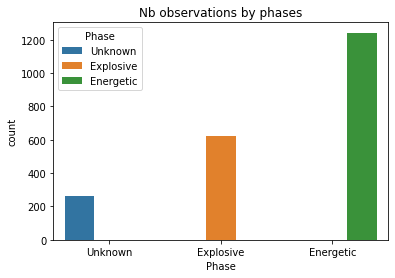

In [37]:
# Countplot for phase
sns.countplot(x="Phase",data=data_acp,hue="Phase")
plt.title("Nb observations by phases")
plt.show()

In [38]:
# Getting numeric features
objList = data_acp.select_dtypes(include = "object").columns
print (objList)


Index(['Athlete', 'Position', 'Session', 'Drill', 'Day Code', 'Participation',
       'Squad', 'Temperature', 'Weather', 'Grass', 'Type', 'Phase'],
      dtype='object')


In [39]:
# kepping phase only 
objList[:-1]
data_acp = data_acp.drop(objList[:-1], axis = 1)

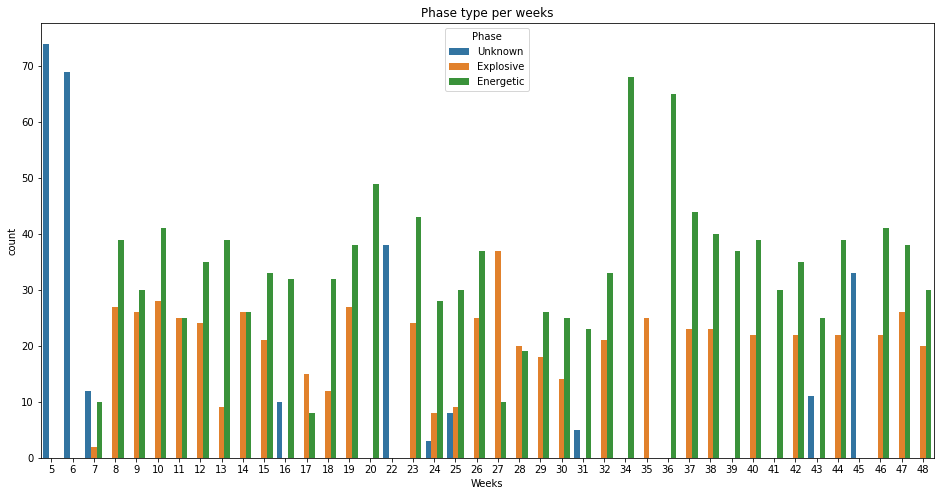

In [40]:
# Plotting phase threw the season
data_acp.sort_values("Weeks").head(5)
plt.figure(figsize=(16,8))
sns.countplot(x="Weeks",data=data_acp,hue="Phase")
plt.title("Phase type per weeks")
plt.show()

* Unknow mostly at start of season -> energetic ?

In [41]:
# Dropping unused features
data_acp = data_acp.drop(["RPE", "Date","Weeks"], axis = 1)

In [42]:
# number of unknown phase training session
len(data_acp[data_acp["Phase"]=="Unknown"])

263

In [43]:
# Percentage of unknown phase training session
len(data_acp[data_acp["Phase"]=="Unknown"])/len(data_acp)

0.12359022556390978

In [44]:
# split data to built a model on session with a label (phase)
data_unknown = data_acp[data_acp["Phase"]=="Unknown"]
data_acp = data_acp[data_acp["Phase"]!="Unknown"]

In [45]:
#Label Encoding phase to numeric conversion
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
data_acp["Target"] = labelencoder.fit_transform(data_acp["Phase"])
data_acp["Target"].unique()

array([1, 0])

In [46]:
# Scaling
from sklearn import preprocessing

X = data_acp.iloc[:,:-2].values

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

## PCA

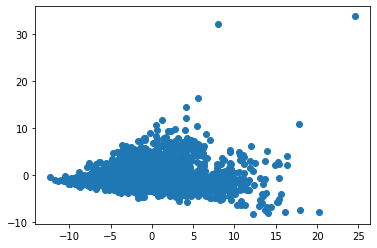

In [47]:
import matplotlib.pyplot as plt

from sklearn import decomposition
p=2
pca = decomposition.PCA(n_components=p)
pca.fit(X_scaled)

# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1])

plt.show()

In [48]:
#variance explained
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.37997143 0.11387707]
0.493848506954585


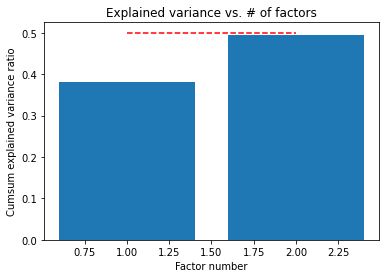

In [49]:
# Cumsum of variance explained
plt.bar(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.hlines(0.5,1,p, linestyles="--", color = "r")
plt.show()

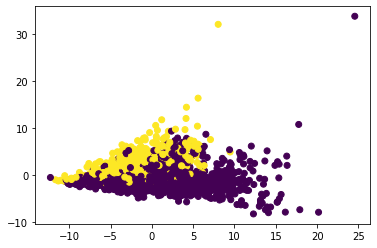

In [50]:
# plotting with color based on phase
plt.scatter(X_projected[:, 0], X_projected[:, 1],c= data_acp["Target"], label = data_acp["Phase"])
plt.show()

## t-SNE

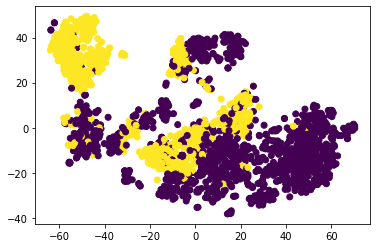

In [51]:
# t-SNE
from sklearn import manifold
tsne = manifold.TSNE(n_components=p,perplexity=40, n_iter=3000, init='pca')
X_trans = tsne.fit_transform(X_scaled)


# plotting with color based on phase
plt.scatter(X_trans[:, 0], X_trans[:, 1],c= data_acp["Target"])


plt.show()

# MODELING

## Train, test split

In [52]:
from sklearn.model_selection import train_test_split

# features
X = X_scaled

# labels
y = data_acp["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Logistic


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [54]:
# Builing model
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

# Make prediction
y_prob = logreg.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0)

# print results
print('Accuracy : ', np.round(accuracy_score(y_test, y_pred),3) )
print('AUC : ', np.round(roc_auc_score(y_test, y_pred),3))

Accuracy :  0.901
AUC :  0.88


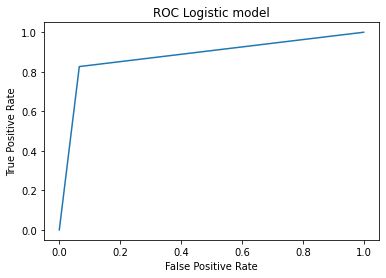

In [55]:
# plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title("ROC Logistic model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#### Gridsearch

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Builing model
lr = LogisticRegression(solver = 'liblinear')
params = {'C': np.logspace(-3, 3, 7) , 'penalty':['l1','l2'] }

lr_gs = GridSearchCV(lr, params, cv=10)
lr_gs.fit(X_train, y_train)

print(lr_gs.best_params_)

{'C': 100.0, 'penalty': 'l2'}


In [57]:
# Make prediction
y_prob = lr_gs.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0) 

# Saving results
log_acc = np.round(accuracy_score(y_test, y_pred),3)

# printing results
print('Accuracy : ', np.round(accuracy_score(y_test, y_pred),3) )
print('AUC : ', np.round(roc_auc_score(y_test, y_pred),3))

Accuracy :  0.898
AUC :  0.882


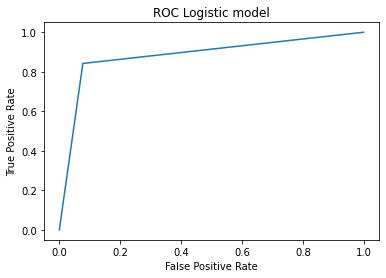

In [58]:
# plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title("ROC Logistic model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## SVM classification

In [59]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

# Builing model
svm = LinearSVC()

params = { 'C': np.logspace(-3, 3, 7) }

gs_svm = GridSearchCV(lr, params, cv=10)
gs_svm.fit(X_train, y_train)

print(gs_svm.best_params_)

{'C': 100.0}


In [60]:
# Make prediction
y_prob = gs_svm.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0) 

# Saving results
svm_acc = np.round(accuracy_score(y_test, y_pred),3)

# printing results
print('Accuracy : ', np.round(accuracy_score(y_test, y_pred),3) )
print('AUC : ', np.round(roc_auc_score(y_test, y_pred),3))

Accuracy :  0.898
AUC :  0.882


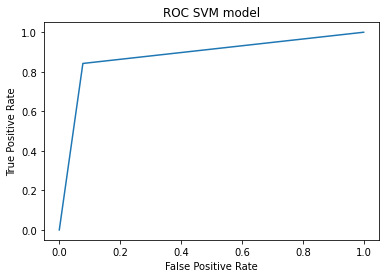

In [61]:
# plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title("ROC SVM model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## kNN

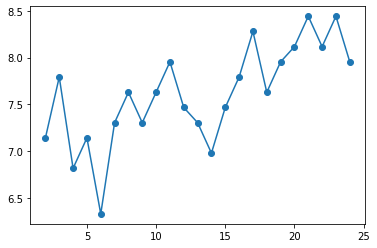

In [62]:
from sklearn import neighbors
import matplotlib.pyplot as plt

errors = []
for k in range(2,25):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,25), errors, 'o-')
plt.show()

In [63]:
# Builing model

knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Make prediction
y_prob = knn.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0) 

# printing results
print('Accuracy : ', np.round(accuracy_score(y_test, y_pred),3) )
print('AUC : ', np.round(roc_auc_score(y_test, y_pred),3))

Accuracy :  0.929
AUC :  0.906


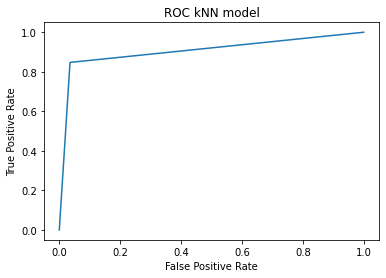

In [64]:
# plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title("ROC kNN model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [65]:
from sklearn import neighbors, metrics
from sklearn import model_selection

# Builing model 

nb_k = np.arange(1,25,1)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors': nb_k}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 1}
Résultats de la validation croisée :
accuracy = 0.913 (+/-0.029) for {'n_neighbors': 1}
accuracy = 0.898 (+/-0.026) for {'n_neighbors': 2}
accuracy = 0.910 (+/-0.011) for {'n_neighbors': 3}
accuracy = 0.907 (+/-0.016) for {'n_neighbors': 4}
accuracy = 0.905 (+/-0.018) for {'n_neighbors': 5}
accuracy = 0.899 (+/-0.023) for {'n_neighbors': 6}
accuracy = 0.904 (+/-0.020) for {'n_neighbors': 7}
accuracy = 0.897 (+/-0.023) for {'n_neighbors': 8}
accuracy = 0.895 (+/-0.013) for {'n_neighbors': 9}
accuracy = 0.891 (+/-0.021) for {'n_neighbors': 10}
accuracy = 0.896 (+/-0.018) for {'n_neighbors': 11}
accuracy = 0.894 (+/-0.013) for {'n_neighbors': 12}
accuracy = 0.895 (+/-0.012) for {'n_neighbors': 13}
accuracy = 0.896 (+/-0.020) for {'n_neighbors': 14}
accuracy = 0.896 (+/-0.023) for {'n_neighbors': 15}
accuracy = 0.897 (+/-0.019) for {'n_neighbors': 16}
accuracy = 0.895 (+/-0.024) for {'n_neighbors': 17}
accuracy = 0

In [66]:
# Make prediction
y_prob = clf.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0) 

# Saving results
knn_acc = np.round(accuracy_score(y_test, y_pred),3)

# printing results
print('Accuracy : ', np.round(accuracy_score(y_test, y_pred),3) )
print('AUC : ', np.round(roc_auc_score(y_test, y_pred),3))

Accuracy :  0.927
AUC :  0.93


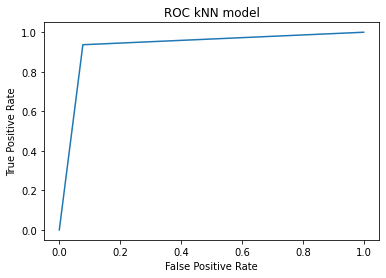

In [67]:
# plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title("ROC kNN model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Random forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Builing model
rfc = RandomForestClassifier(n_estimators=500, oob_score=True)
model = rfc.fit(X_train, y_train)

# Make prediction
y_prob = model.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0) 

# Saving results
rfc_acc = np.round(accuracy_score(y_test, y_pred),3)

# printing results
print('Accuracy : ', np.round(accuracy_score(y_test, y_pred),3) )
print('AUC : ', np.round(roc_auc_score(y_test, y_pred),3))

Accuracy :  0.94
AUC :  0.92


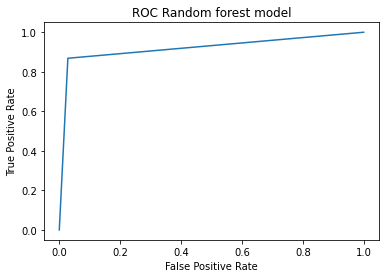

In [69]:
# plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title("ROC Random forest model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Bagging

In [70]:
from sklearn.ensemble import BaggingClassifier 

# Builing model
bagging = BaggingClassifier(n_estimators=5)
bagging.fit(X_train, y_train)

# Make prediction
y_prob = bagging.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0) 

# Saving results
bagging_acc = np.round(accuracy_score(y_test, y_pred),3)

# printing results
print('Accuracy : ', np.round(accuracy_score(y_test, y_pred),3) )
print('AUC : ', np.round(roc_auc_score(y_test, y_pred),3))

Accuracy :  0.894
AUC :  0.87


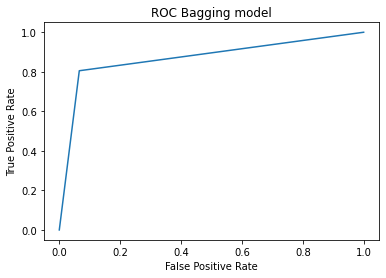

In [71]:
# plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title("ROC Bagging model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## SCORING

In [72]:
# intialise data of lists. 
acc = {'Model':['Logistic', 'SVM', 'kNN', 'Random Forest', "Bagging"],
        'Accuracy':[log_acc,svm_acc,knn_acc,rfc_acc,bagging_acc]} 
  
# Create DataFrame 
df = pd.DataFrame(acc) 
  
# Print the output. 
df

,Model,Accuracy
0,Logistic,0.898
1,SVM,0.898
2,kNN,0.927
3,Random Forest,0.940
4,Bagging,0.894


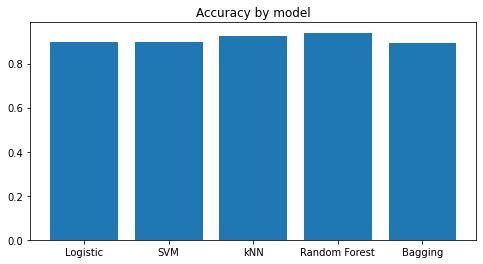

In [73]:
plt.figure(figsize=(8,4))
plt.bar(df["Model"],df["Accuracy"])
plt.title("Accuracy by model")
plt.show()

# PRODUCTION

In [74]:
# scaling data to predict
unknown_scaled = std_scale.transform(data_unknown.iloc[:,:-1])

# Make prediction
y_prob = rfc.predict_proba(unknown_scaled)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0)

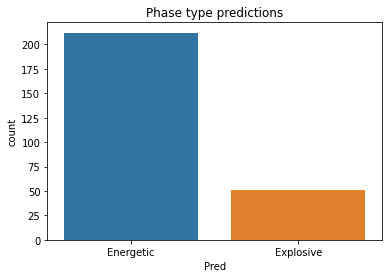

In [75]:
# inverse label encoding
data_unknown["Pred"] = labelencoder.inverse_transform(y_pred)

# Plotting prediction
sns.countplot(x="Pred",data=data_unknown)
plt.title("Phase type predictions")
plt.show()

In [76]:
# Getting probalities for both cases
data_unknown["Energetic_prob"] = rfc.predict_proba(unknown_scaled)[:,0] 
data_unknown["Explosive_prob"] = rfc.predict_proba(unknown_scaled)[:,1] 

# Probaiblities from data
data_unknown[["Phase","Pred","Energetic_prob","Explosive_prob"]]

,Phase,Pred,Energetic_prob,Explosive_prob
0,Unknown,Energetic,0.786,0.214
1,Unknown,Energetic,0.936,0.064
2,Unknown,Energetic,0.758,0.242
3,Unknown,Energetic,0.928,0.072
4,Unknown,Energetic,0.712,0.288
...,...,...,...,...
2072,Unknown,Energetic,0.930,0.070
2145,Unknown,Energetic,0.638,0.362
2164,Unknown,Energetic,0.848,0.152
2169,Unknown,Energetic,0.948,0.052
